In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

print("X shape :", X.shape)
print("y shape :", y.shape)

X shape : (1797, 64)
y shape : (1797,)


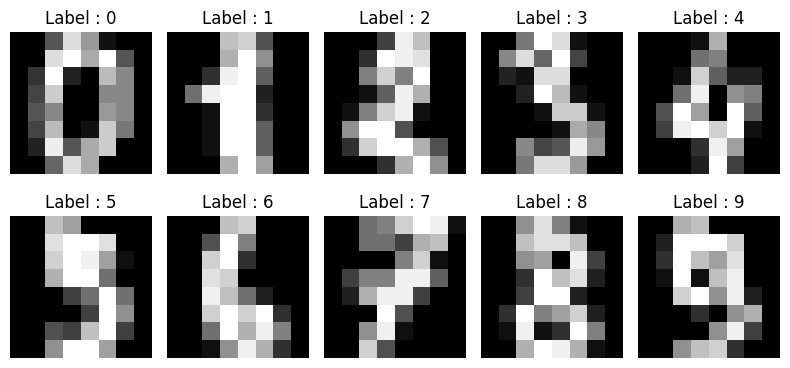

In [3]:
plt.figure(figsize=(8,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label : {digits.target[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (1437, 64) (1437,)
Test : (360, 64) (360,)


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Accuracy for K=3 :", acc)

Accuracy for K=3 : 0.9666666666666667


In [7]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)

    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc}")

K = 3, Accuracy = 0.9666666666666667
K = 5, Accuracy = 0.9638888888888889
K = 7, Accuracy = 0.9666666666666667
K = 9, Accuracy = 0.9638888888888889


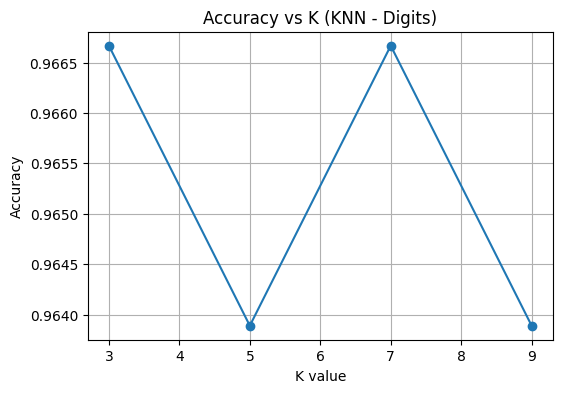

In [8]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K (KNN - Digits)")
plt.grid(True)
plt.show()

Best K : 3


<Figure size 800x800 with 0 Axes>

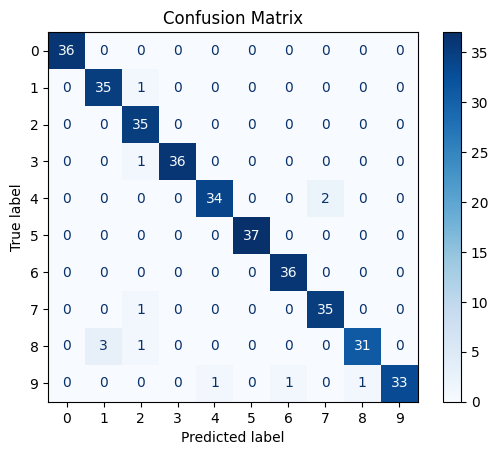

In [9]:
best_k = k_values[np.argmax(accuracies)]
print("Best K :", best_k)

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, y_train)

best_preds = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, best_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=digits.target_names)

plt.figure(figsize=(8,8))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

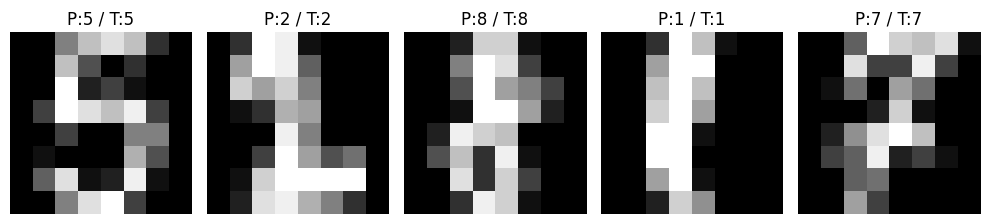

In [10]:
plt.figure(figsize=(10,4))

for i in range(5):

    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')

    pred_label = best_model.predict(X_test_scaled[i].reshape(1,-1))[0]
    true_label = y_test[i]

    plt.title(f"P:{pred_label} / T:{true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [11]:
import joblib
joblib.dump(best_model, "knn_digits_best.pkl")
print("Saved: knn_digits_best.pkl")

Saved: knn_digits_best.pkl
